In [93]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '08f13213-266e-43ea-93b3-04f6821983ba',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2022-10-12T14:25:24.462Z', 'error_code': 0, 'error_message': None, 'elapsed': 48, 'credit_count': 1, 'notice': None, 'total_count': 9399}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9771, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [94]:
type(data)

dict

In [95]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [96]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').astype('datetime64[ns, UTC]').dt.tz_convert('Europe/Berlin')
df

C:\Users\elsha\AppData\Local\Temp/ipykernel_9528/3373973144.py:5: FutureWarning: Using .astype to convert from timezone-naive dtype to timezone-aware dtype is deprecated and will raise in a future version.  Use ser.dt.tz_localize instead.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').astype('datetime64[ns, UTC]').dt.tz_convert('Europe/Berlin')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9771,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19177193.00000,19177193.00000,NaN,1,NaN,NaN,None,2022-10-12T14:23:00.000Z,19089.98564,27515544144.32224,-6.69260,0.05101,0.39260,-3.68825,-14.90336,-22.12581,-3.24551,366092338892.04486,39.74380,400889698337.65002,None,2022-10-12T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 16:25:37.150107+02:00
1,1027,Ethereum,ETH,ethereum,6135,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122764153.49900,122764153.49900,NaN,2,NaN,NaN,None,2022-10-12T14:23:00.000Z,1295.66964,8658075396.06096,-9.38000,0.07761,1.16065,-1.97417,-26.02840,-34.67312,19.67142,159061786101.04929,17.26780,159061786101.04999,None,2022-10-12T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 16:25:37.150107+02:00
2,825,Tether,USDT,tether,40703,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68421859091.17427,70146125804.35918,NaN,3,NaN,NaN,None,2022-10-12T14:23:00.000Z,1.00001,35789185005.60652,-12.46870,0.00271,0.00884,-0.01399,-0.01749,-0.03627,0.06279,68422883748.17926,7.42770,70147176283.25999,None,2022-10-12T14:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-12 16:25:37.150107+02:00
3,3408,USD Coin,USDC,usd-coin,6489,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45890639013.41422,45890639013.41422,NaN,4,NaN,NaN,None,2022-10-12T14:23:00.000Z,1.00007,3230671326.79212,-12.96710,0.00627,0.00449,0.01150,0.01099,0.02116,-0.00825,45893685716.06911,4.98230,45893685716.07000,None,2022-10-12T14:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-12 16:25:37.150107+02:00
4,1839,BNB,BNB,bnb,1123,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-10-12T14:23:00.000Z,270.29407,564819460.68708,-14.50990,-0.03376,-0.46265,-6.78417,-9.63989,-18.11003,18.71017,43608504644.11582,4.73420,54058813629.90000,None,2022-10-12T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 16:25:37.150107+02:00
5,52,XRP,XRP,xrp,826,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49964184162.00000,99989267435.00000,NaN,6,NaN,NaN,None,2022-10-12T14:23:00.000Z,0.48857,1699472609.98264,-34.27550,-0.09800,-0.86166,2.11221,37.32424,28.42661,55.77769,24410794573.89294,2.65010,48856585939.13000,None,2022-10-12T14:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 16:25:37.150107+02:00
6,4687,Binance USD,BUSD,binance-usd,5257,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-12T14:23:00.000Z,1.00019,5855010918.09690,-14.10450,0.00954,-0.01164,-0.00254,0.00849,0.00663,-0.15212,21632279935.20062,2.34840,21632279935.20000,None,2022-10-12T14:23:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-12 16:25:37.150107+02:00
7,2010,Cardano,ADA,cardano,578,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34279094797.12500,35007351299.34100,NaN,8,NaN,NaN,None,2022-10-12T14:23:00.000Z,0.39064,431064449.60249,-37.72270,-0.13204,-1.49240,-8.03071,-24.69522,-30.67024,-6.83751,13390710076.48266,1.45370,17578700867.34000,None,2022

In [97]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '08f13213-266e-43ea-93b3-04f6821983ba',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').astype('datetime64[ns, UTC]').dt.tz_convert('Europe/Berlin')
    df
    
    if not os.path.isfile(r'D:\Data Analysis\Python for Data Science\Python Projects\Automating Crypto Website API Pull\API.csv'):
        df.to_csv(r'D:\Data Analysis\Python for Data Science\Python Projects\Automating Crypto Website API Pull\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Data Analysis\Python for Data Science\Python Projects\Automating Crypto Website API Pull\API.csv', mode='a', header=False)
    

In [98]:
import os
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minutte
exit()    

C:\Users\elsha\AppData\Local\Temp/ipykernel_9528/2285046350.py:31: FutureWarning: Using .astype to convert from timezone-naive dtype to timezone-aware dtype is deprecated and will raise in a future version.  Use ser.dt.tz_localize instead.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').astype('datetime64[ns, UTC]').dt.tz_convert('Europe/Berlin')


API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [99]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [100]:
df = pd.read_csv(r'D:\Data Analysis\Python for Data Science\Python Projects\Automating Crypto Website API Pull\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9771,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19177193.00000,19177193.00000,NaN,1,NaN,NaN,NaN,2022-10-12T14:24:00.000Z,19089.26871,27513183729.00372,-6.72340,0.04174,0.39052,-3.68320,-14.90824,-22.13037,-3.24828,366078590239.40784,39.74230,400874642864.96997,NaN,2022-10-12T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 16:25:46.108590+02:00
1,1,1027,Ethereum,ETH,ethereum,6135,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122764153.49900,122764153.49900,NaN,2,NaN,NaN,NaN,2022-10-12T14:24:00.000Z,1295.52339,8658524201.18095,-9.37510,0.05402,1.15805,-1.97953,-26.03668,-34.69154,19.66302,159043832292.07635,17.26590,159043832292.07999,NaN,2022-10-12T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 16:25:46.108590+02:00
2,2,825,Tether,USDT,tether,40703,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68421859091.17427,70146125804.35918,NaN,3,NaN,NaN,NaN,2022-10-12T14:24:00.000Z,1.00000,35792645761.61625,-12.46050,0.00164,0.00691,-0.01494,-0.01729,-0.03726,0.06243,68422190377.33888,7.43010,70146465439.11000,NaN,2022-10-12T14:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-12 16:25:46.108590+02:00
3,3,3408,USD Coin,USDC,usd-coin,6489,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,45890639013.41422,45890639013.41422,NaN,4,NaN,NaN,NaN,2022-10-12T14:24:00.000Z,1.00009,3230733124.60956,-12.96530,0.00730,0.00557,0.01430,0.00908,0.02555,-0.00438,45894621891.80475,4.98240,45894621891.80000,NaN,2022-10-12T14:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-12 16:25:46.108590+02:00
4,4,1839,BNB,BNB,bnb,1123,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-10-12T14:24:00.000Z,270.30127,564862476.38696,-14.50120,-0.03895,-0.45179,-6.77592,-9.64318,-18.11354,18.70912,43609667245.75127,4.73440,54060254836.51000,NaN,2022-10-12T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 16:25:46.108590+02:00
5,5,52,XRP,XRP,xrp,826,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,49964184162.00000,99989267435.00000,NaN,6,NaN,NaN,NaN,2022-10-12T14:24:00.000Z,0.48852,1699128531.46532,-34.28180,-0.11785,-0.85454,2.09761,37.30275,28.41334,55.76225,24408399989.09692,2.64980,48851793336.52000,NaN,2022-10-12T14:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-12 16:25:46.108590+02:00
6,6,4687,Binance USD,BUSD,binance-usd,5257,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,NaN,2022-10-12T14:24:00.000Z,1.00019,5855070119.79930,-14.10360,0.00797,-0.01199,-0.06370,0.00653,0.00904,-0.15289,21632194606.69328,2.34840,21632194606.69000,NaN,2022-10-12T14:24:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-12 16:25:46.108590+02:00
7,7,2010,Cardano,ADA,cardano,578,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34279094797.12500,35007351299.34100,NaN,8,NaN,NaN,NaN,2022-10-12T14:24:00.000Z,0.39061,431103500.04155,-37.72270,-0.14595,-1.50270,-8.04367,-24.69240,-30.67149,-6.84527,13389610351.27412,1.45360,17577257199.270

In [101]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02310,0.34893,-3.67462,-14.86425,-22.07921,-3.27774
Ethereum,0.03324,1.14492,-2.02781,-25.96641,-34.68729,19.65595
Tether,0.00320,0.00756,-0.01368,-0.02177,-0.03632,0.05740
USD Coin,-0.00238,-0.00113,0.00328,0.00949,0.02004,-0.00965
BNB,-0.05029,-0.44703,-6.80988,-9.54937,-18.06386,18.68778
XRP,-0.19420,-0.89780,1.87947,37.32921,28.37780,55.67917
Binance USD,0.02953,0.04248,-0.02558,0.01627,0.01729,0.02469
Cardano,-0.16208,-1.53135,-8.07566,-24.59232,-30.78290,-6.87486
Solana,-0.16359,-0.71499,-6.70547,-18.34440,-33.21915,-8.21153


In [102]:
df2 = df2.stack()
df2

name                                     
Bitcoin      quote.USD.percent_change_1h      0.02310
             quote.USD.percent_change_24h     0.34893
             quote.USD.percent_change_7d     -3.67462
             quote.USD.percent_change_30d   -14.86425
             quote.USD.percent_change_60d   -22.07921
             quote.USD.percent_change_90d    -3.27774
Ethereum     quote.USD.percent_change_1h      0.03324
             quote.USD.percent_change_24h     1.14492
             quote.USD.percent_change_7d     -2.02781
             quote.USD.percent_change_30d   -25.96641
             quote.USD.percent_change_60d   -34.68729
             quote.USD.percent_change_90d    19.65595
Tether       quote.USD.percent_change_1h      0.00320
             quote.USD.percent_change_24h     0.00756
             quote.USD.percent_change_7d     -0.01368
             quote.USD.percent_change_30d    -0.02177
             quote.USD.percent_change_60d    -0.03632
             quote.USD.percent_change_90

In [103]:
type(df2)

pandas.core.series.Series

In [104]:
df2 = df2.to_frame(name='values')
df2

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.02310
            quote.USD.percent_change_24h   0.34893
            quote.USD.percent_change_7d   -3.67462
            quote.USD.percent_change_30d -14.86425
            quote.USD.percent_change_60d -22.07921
            quote.USD.percent_change_90d  -3.27774
Ethereum    quote.USD.percent_change_1h    0.03324
            quote.USD.percent_change_24h   1.14492
            quote.USD.percent_change_7d   -2.02781
            quote.USD.percent_change_30d -25.96641
            quote.USD.percent_change_60d -34.68729
            quote.USD.percent_change_90d  19.65595
Tether      quote.USD.percent_change_1h    0.00320
            quote.USD.percent_change_24h   0.00756
            quote.USD.percent_change_7d   -0.01368
            quote.USD.percent_change_30d  -0.02177
            quote.USD.percent_change_60d  -0.03632
            quote.USD.percent_change_90d   0.05740
USD Coin    quote.USD.percent_change_1h   -0.00238
            quote.USD.percent_change_24h  -0.00113
            quote.USD.percent_change_7d    0.00328
            quote.USD.percent_change_30d   0.00949
            quote.USD.percent_change_60d   0.02004
            quote.USD.percent_change_90d  -0.00965
BNB         quote.USD.percent_change_1h   -0.05029
            quote.USD.percent_change_24h  -0.44703
            quote.USD.percent_change_7d   -6.80988
            quote.USD.percent_change_30d  -9.54937
            quote.USD.percent_change_60d -18.06386
            quote.USD.percent_change_90d  18.68778
XRP         quote.USD.percent_change_1h   -0.19420
            quote.USD.percent_change_24h  -0.89780
            quote.USD.percent_change_7d    1.87947
            quote.USD.percent_change_30d  37.32921
            quote.USD.percent_change_60d  28.37780
            quote.USD.percent_change_90d  55.67917
Binance USD quote.USD.percent_change_1h    0.02953
            quote.USD.percent_change_24h   0.04248
            quote.USD.percent_change_7d   -0.02558
            quote.USD.percent_change_30d   0.01627
            quote.USD.percent_change_60d   0.01729
            quote.USD.percent_change_90d   0.02469
Cardano     quote.USD.percent_change_1h   -0.16208
            quote.USD.percent_change_24h  -1.53135
            quote.USD.percent_change_7d   -8.07566
            quote.USD.percent_change_30d -24.59232
            quote.USD.percent_change_60d -30.78290
            quote.USD.percent_change_90d  -6.87486
Solana      quote.USD.percent_change_1h   -0.16359
            quote.USD.percent_change_24h  -0.71499
            quote.USD.percent_change_7d   -6.70547
            quote.USD.percent_change_30d -18.34440
            quote.USD.percent_change_60d -33.21915
            quote.USD.percent_change_90d  -8.21153
Dogecoin    quote.USD.percent_change_1h    0.05156
            quote.USD.percent_change_24h  -0.13364
            quote.USD.percent_change_7d   -5.51584
            quote.USD.percent_change_30d  -7.49533
            quote.USD.percent_change_60d -18.53109
            quote.USD.percent_change_90d  -0.59157
Polkadot    quote.USD.percent_change_1h   -0.08696
            quote.USD.percent_change_24h  -0.00643
            quote.USD.percent_change_7d   -1.71567
            quote.USD.percent_change_30d -22.50223
            quote.USD.percent_change_60d -34.75795
            quote.USD.percent_change_90d  -2.50335
Polygon     quote.USD.percent_change_1h   -0.21729
            quote.USD.percent_change_24h  -0.39390
            quote.USD.percent_change_7d   -4.62441
            quote.USD.percent_change_30d -15.05610
            quote.USD.percent_change_60d -21.11740
            quote.USD.percent_change_90d  27.13388
Dai         quote.USD.percent_change_1h   -0.01586
            quote.USD.percent_change_24h  -0.02869
            quote.USD.percent_change_7d   -0.00851
            quote.USD.percent_change_30d  -0.03506
            quote.USD.percent_change_60d   0.00153
            quo

In [105]:
df2.count()

values    90
dtype: int64

In [106]:
index = pd.Index(range(90))

df2 = df2.reset_index()
df2

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02310
1,Bitcoin,quote.USD.percent_change_24h,0.34893
2,Bitcoin,quote.USD.percent_change_7d,-3.67462
3,Bitcoin,quote.USD.percent_change_30d,-14.86425
4,Bitcoin,quote.USD.percent_change_60d,-22.07921
5,Bitcoin,quote.USD.percent_change_90d,-3.27774
6,Ethereum,quote.USD.percent_change_1h,0.03324
7,Ethereum,quote.USD.percent_change_24h,1.14492
8,Ethereum,quote.USD.percent_change_7d,-2.02781
9,Ethereum,quote.USD.percent_change_30d,-25.96641


In [107]:
df2 = df2.rename(columns={'level_1': 'percent_change'})
df2

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02310
1,Bitcoin,quote.USD.percent_change_24h,0.34893
2,Bitcoin,quote.USD.percent_change_7d,-3.67462
3,Bitcoin,quote.USD.percent_change_30d,-14.86425
4,Bitcoin,quote.USD.percent_change_60d,-22.07921
5,Bitcoin,quote.USD.percent_change_90d,-3.27774
6,Ethereum,quote.USD.percent_change_1h,0.03324
7,Ethereum,quote.USD.percent_change_24h,1.14492
8,Ethereum,quote.USD.percent_change_7d,-2.02781
9,Ethereum,quote.USD.percent_change_30d,-25.96641


In [108]:
df2['percent_change'] = df2['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df2

,name,percent_change,values
0,Bitcoin,1h,0.02310
1,Bitcoin,24h,0.34893
2,Bitcoin,7d,-3.67462
3,Bitcoin,30d,-14.86425
4,Bitcoin,60d,-22.07921
5,Bitcoin,90d,-3.27774
6,Ethereum,1h,0.03324
7,Ethereum,24h,1.14492
8,Ethereum,7d,-2.02781
9,Ethereum,30d,-25.96641


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

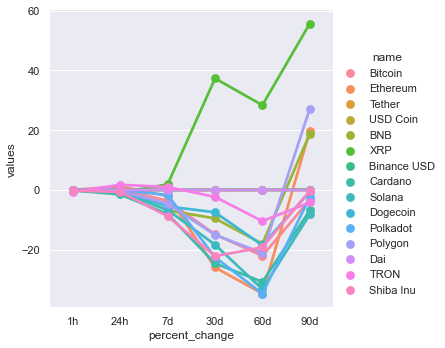

In [110]:
sns.catplot(x='percent_change', y='values', hue='name', data=df2, kind='point')

In [118]:
df3 = df[['name','quote.USD.price','timestamp']]
df3 = df3.query("name == 'Bitcoin'")
df3

,name,quote.USD.price,timestamp
0,Bitcoin,19089.26871,2022-10-12 16:25:46.108590+02:00
15,Bitcoin,19081.37171,2022-10-12 16:26:46.501399+02:00
30,Bitcoin,19083.14954,2022-10-12 16:27:46.881216+02:00
45,Bitcoin,19095.15593,2022-10-12 16:28:47.545857+02:00
60,Bitcoin,19095.15593,2022-10-12 16:29:48.240484+02:00
75,Bitcoin,19104.31582,2022-10-12 16:30:48.630291+02:00


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

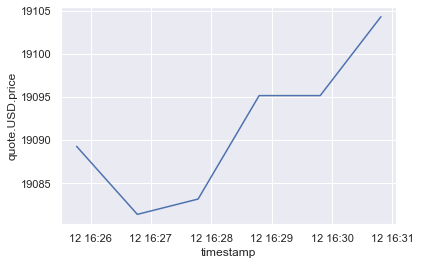

In [175]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df3)